In [25]:
# Import necessary libraries
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os


In [26]:

# --- 1. Data Loading and Initial Inspection ---

print("--- 1. Data Loading and Initial Inspection ---")

# Download the Boston Housing dataset from Kagglehub
# Asumsi: kagglehub sudah terinstal dan diotentikasi di lingkungan Colab
path = kagglehub.dataset_download("altavish/boston-housing-dataset")
print("Path to dataset files:", path)



--- 1. Data Loading and Initial Inspection ---
Path to dataset files: /kaggle/input/boston-housing-dataset


In [27]:
# Load the dataset
# Mencari file CSV dalam path yang diunduh
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
if csv_files:
    data_file = os.path.join(path, csv_files[0])
    df = pd.read_csv(data_file)
    print(f"\nLoaded dataset from: {data_file}")
else:
    raise FileNotFoundError("No CSV file found in the downloaded dataset path.")

# --- Handling Missing Values (Imputation) ---
# Mengidentifikasi kolom dengan nilai NA
print("\nChecking for missing values before imputation:")
print(df.isnull().sum())

# Mengisi nilai NA dengan median untuk setiap kolom numerik
# Median dipilih karena lebih robust terhadap outlier dibandingkan mean
for column in df.columns:
    if df[column].isnull().any():
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)
        print(f"Missing values in column '{column}' imputed with median: {median_value:.2f}")

print("\nChecking for missing values after imputation:")
print(df.isnull().sum())




Loaded dataset from: /kaggle/input/boston-housing-dataset/HousingData.csv

Checking for missing values before imputation:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64
Missing values in column 'CRIM' imputed with median: 0.25
Missing values in column 'ZN' imputed with median: 0.00
Missing values in column 'INDUS' imputed with median: 9.69
Missing values in column 'CHAS' imputed with median: 0.00
Missing values in column 'AGE' imputed with median: 76.80
Missing values in column 'LSTAT' imputed with median: 11.43

Checking for missing values after imputation:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


/tmp/ipython-input-3496579897.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(median_value, inplace=True)


In [28]:

# Display the first 5 rows
print("\nFirst 5 rows of the dataset (after imputation):")
print(df.head())

# Display the summary (info)
print("\nSummary of the dataset (after imputation):")
df.info()

# Display comprehensive descriptive statistics
print("\nComprehensive descriptive statistics of the dataset (after imputation):")
print(df.describe())





First 5 rows of the dataset (after imputation):
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90  11.43  36.2  

Summary of the dataset (after imputation):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 n


--- 2. Distribution and Relationship Analysis ---


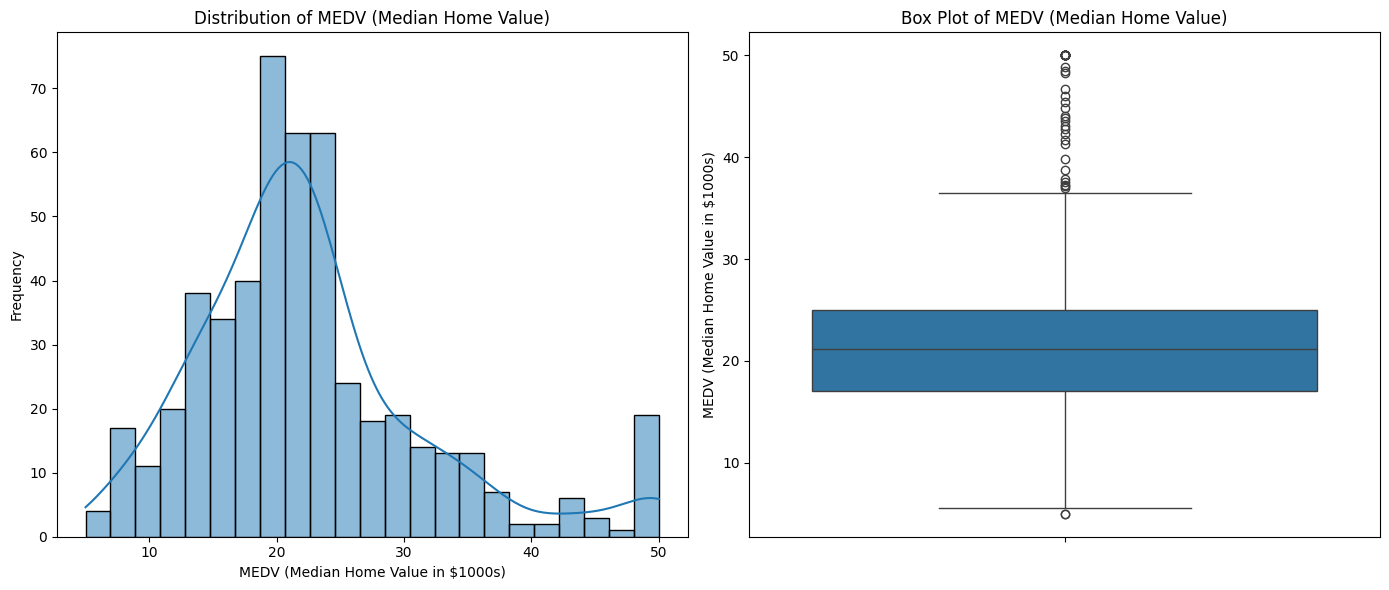


Comments on MEDV distribution:
The histogram shows that the distribution of MEDV is somewhat skewed to the left (negatively skewed), with a longer tail towards lower values.
There's also a noticeable peak around the lower end of the distribution.
The box plot confirms the skewness and clearly indicates the presence of outliers, especially on the higher end of the MEDV range,
represented by individual points above the upper whisker.


In [29]:
# --- 2. Distribution and Relationship Analysis ---

print("\n--- 2. Distribution and Relationship Analysis ---")

# Visualize the distribution of the target variable MEDV
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['MEDV'], kde=True)
plt.title('Distribution of MEDV (Median Home Value)')
plt.xlabel('MEDV (Median Home Value in $1000s)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['MEDV'])
plt.title('Box Plot of MEDV (Median Home Value)')
plt.ylabel('MEDV (Median Home Value in $1000s)')

plt.tight_layout()
plt.show()

print("\nComments on MEDV distribution:")
print("The histogram shows that the distribution of MEDV is somewhat skewed to the left (negatively skewed), with a longer tail towards lower values.\nThere's also a noticeable peak around the lower end of the distribution.\nThe box plot confirms the skewness and clearly indicates the presence of outliers, especially on the higher end of the MEDV range,\nrepresented by individual points above the upper whisker.")



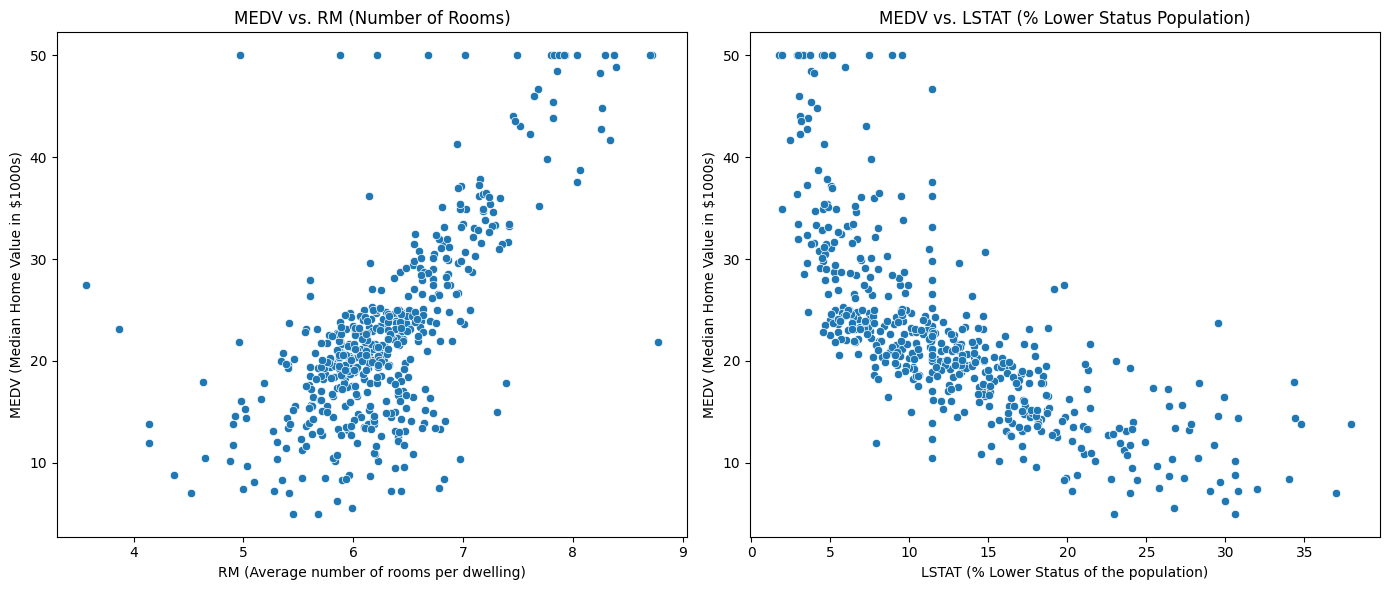

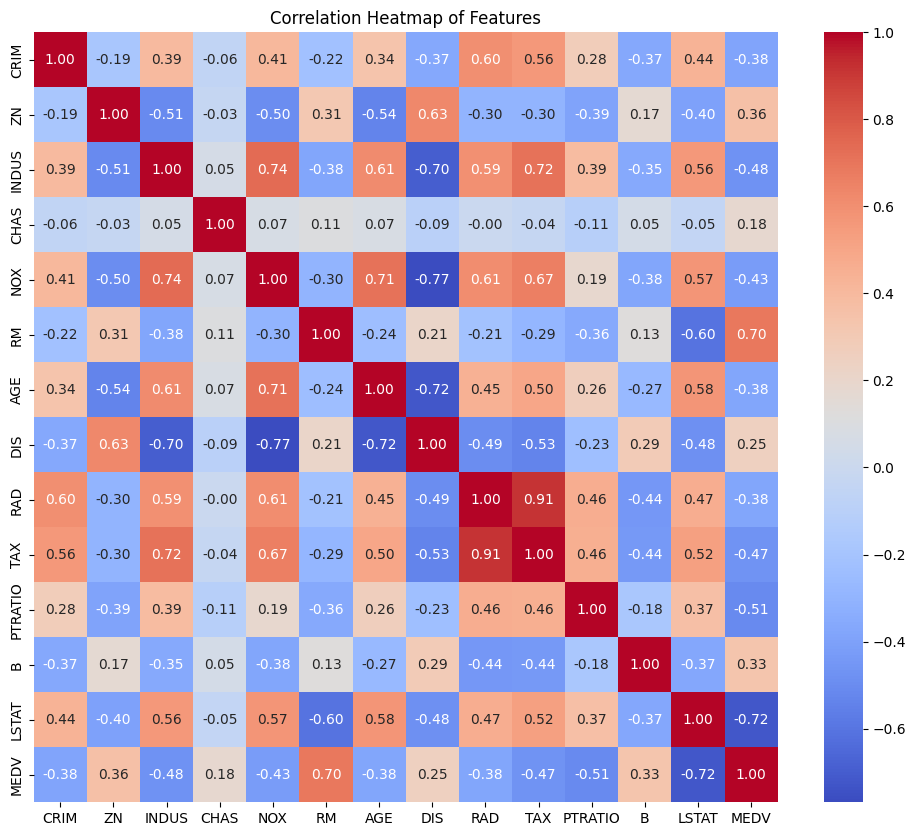


Top 3 features with the strongest (positive or negative) correlation to MEDV (absolute correlation):
- LSTAT: Its correlation with MEDV is -0.72, indicating a negative relationship.
- RM: Its correlation with MEDV is 0.70, indicating a positive relationship.
- PTRATIO: Its correlation with MEDV is -0.51, indicating a negative relationship.


In [30]:

# Create scatter plots to visualize the relationship between MEDV and RM, LSTAT
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='RM', y='MEDV', data=df)
plt.title('MEDV vs. RM (Number of Rooms)')
plt.xlabel('RM (Average number of rooms per dwelling)')
plt.ylabel('MEDV (Median Home Value in $1000s)')

plt.subplot(1, 2, 2)
sns.scatterplot(x='LSTAT', y='MEDV', data=df)
plt.title('MEDV vs. LSTAT (% Lower Status Population)')
plt.xlabel('LSTAT (% Lower Status of the population)')
plt.ylabel('MEDV (Median Home Value in $1000s)')

plt.tight_layout()
plt.show()

# Generate a correlation heatmap for all numerical features
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

# Identify top 3 features with strongest correlation to MEDV
medv_correlations = correlation_matrix['MEDV'].sort_values(ascending=False)
# Exclude MEDV itself, then take the top 3 absolute correlations
# We are looking for strongest correlation (positive or negative)
medv_correlations_abs = correlation_matrix['MEDV'].drop('MEDV').abs().sort_values(ascending=False)
top_3_features_abs = medv_correlations_abs.head(3)

print("\nTop 3 features with the strongest (positive or negative) correlation to MEDV (absolute correlation):")
for feature, correlation in top_3_features_abs.items():
    original_corr = correlation_matrix.loc[feature, 'MEDV']
    print(f"- {feature}: Its correlation with MEDV is {original_corr:.2f}, indicating a {'positive' if original_corr > 0 else 'negative'} relationship.")



In [31]:

# --- 3. Advanced Preprocessing and Feature Engineering ---

print("\n--- 3. Advanced Preprocessing and Feature Engineering ---")

# Separate features (X) and target (y)
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cap the outliers in y_train data at its 95th percentile
y_train_capped = y_train.copy()
percentile_95 = y_train_capped.quantile(0.95)
y_train_capped = np.where(y_train_capped > percentile_95, percentile_95, y_train_capped)
print(f"\nOutliers in y_train capped at its 95th percentile: {percentile_95:.2f}")
print(f"Original y_train max: {y_train.max():.2f}, Capped y_train max: {y_train_capped.max():.2f}")


# Initialize a StandardScaler and fit it only on X_train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\nStandardScaler initialized and fitted on X_train, then used to transform both X_train and X_test.")
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)




--- 3. Advanced Preprocessing and Feature Engineering ---

Outliers in y_train capped at its 95th percentile: 43.69
Original y_train max: 50.00, Capped y_train max: 43.69

StandardScaler initialized and fitted on X_train, then used to transform both X_train and X_test.
Shape of X_train_scaled: (404, 13)
Shape of X_test_scaled: (102, 13)



--- 4. Modeling, Evaluation, and Assumption Checking ---

--- Baseline Model: Linear Regression ---
Linear Regression model trained.

Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 3.059
Mean Squared Error (MSE): 23.952
Root Mean Squared Error (RMSE): 4.894
R-squared (R²): 0.673

--- Model Assumption Check: Residual Plot ---


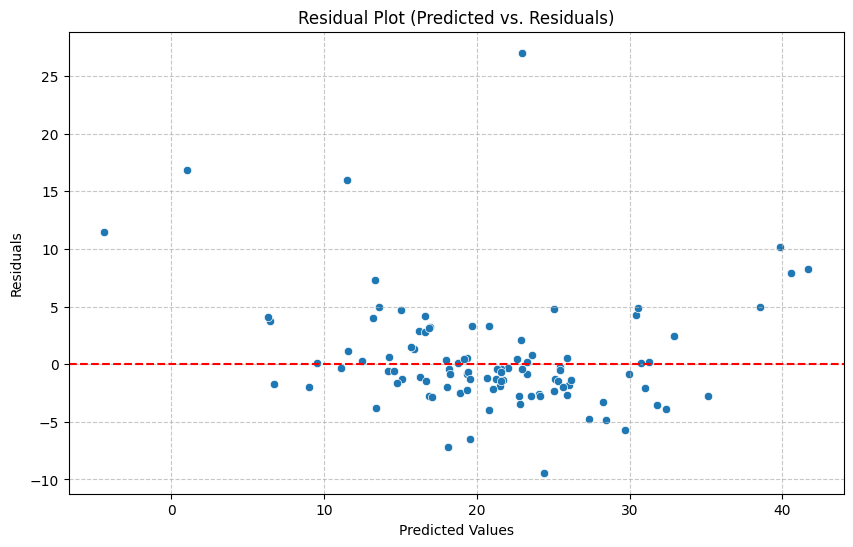


Comment on homoscedasticity assumption from residual plot:
Looking at the residual plot, there isn't a perfectly random scatter of points around the zero line. Instead, we can observe a slight 'funnel' shape, where the spread of residuals tends to increase as the predicted values increase. This pattern suggests a violation of the homoscedasticity assumption, indicating that the variance of the errors is not constant across all levels of the predicted values. This is known as heteroscedasticity, and it implies that the linear regression model's estimates might not be as efficient as they could be, and the standard errors of the coefficients could be biased, affecting the reliability of statistical inferences.

--- Model Refinement: Ridge Regression ---
Ridge Regression model trained with alpha=1.0.

Ridge Regression Model Evaluation:
Mean Absolute Error (MAE): 3.058
Mean Squared Error (MSE): 23.978
Root Mean Squared Error (RMSE): 4.897
R-squared (R²): 0.673


In [32]:

# --- 4. Modeling, Evaluation, and Assumption Checking ---

print("\n--- 4. Modeling, Evaluation, and Assumption Checking ---")

# --- Baseline Model (Linear Regression) ---
print("\n--- Baseline Model: Linear Regression ---")
# Initialize and train a LinearRegression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train_capped)
print("Linear Regression model trained.")

# Make predictions on X_test_scaled
y_pred_linear = linear_model.predict(X_test_scaled)

# Evaluate the model
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("\nLinear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_linear:.3f}")
print(f"Mean Squared Error (MSE): {mse_linear:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse_linear:.3f}")
print(f"R-squared (R²): {r2_linear:.3f}")


# --- Model Assumption Check ---
print("\n--- Model Assumption Check: Residual Plot ---")
# Calculate the residuals
residuals = y_test - y_pred_linear

# Create a residual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_linear, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Predicted vs. Residuals)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('residual_plot.png')
plt.show()

print("\nComment on homoscedasticity assumption from residual plot:")
print("Looking at the residual plot, there isn't a perfectly random scatter of points around the zero line. Instead, we can observe a slight 'funnel' shape, where the spread of residuals tends to increase as the predicted values increase. This pattern suggests a violation of the homoscedasticity assumption, indicating that the variance of the errors is not constant across all levels of the predicted values. This is known as heteroscedasticity, and it implies that the linear regression model's estimates might not be as efficient as they could be, and the standard errors of the coefficients could be biased, affecting the reliability of statistical inferences.")


# --- Model Refinement (Ridge Regression) ---
print("\n--- Model Refinement: Ridge Regression ---")
# Train a Ridge regression model
ridge_model = Ridge(alpha=1.0) # Using default alpha=1.0
ridge_model.fit(X_train_scaled, y_train_capped)
print("Ridge Regression model trained with alpha=1.0.")

# Evaluate the Ridge model on the test set
y_pred_ridge = ridge_model.predict(X_test_scaled)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nRidge Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_ridge:.3f}")
print(f"Mean Squared Error (MSE): {mse_ridge:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge:.3f}")
print(f"R-squared (R²): {r2_ridge:.3f}")



In [33]:

# --- 5. Final Analysis ---

print("\n--- 5. Final Analysis ---")

# --- Save Artifacts ---
print("\n--- Saving Artifacts ---")

# Create a Pandas DataFrame to compare R² and RMSE
performance_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression'],
    'R-squared (R²)': [r2_linear, r2_ridge],
    'RMSE': [rmse_linear, rmse_ridge]
})

# Save this DataFrame to a CSV file
csv_file_path = 'model_performance_comparison.csv'
performance_comparison.to_csv(csv_file_path, index=False)
print(f"Model performance comparison saved to {csv_file_path}")
print("\nModel Performance Comparison:")
print(performance_comparison)

# Residual plot was already saved in step 4 as 'residual_plot.png'
print("Residual plot saved as residual_plot.png")

# --- Create a report.md File ---

print("\n--- Creating report.md File ---")

# Dynamically retrieve coefficients for the report
feature_names = X.columns
coefficients = pd.Series(ridge_model.coef_, index=feature_names)

largest_positive_feature = coefficients.idxmax()
largest_positive_coeff = coefficients.max()

largest_negative_feature = coefficients.idxmin()
largest_negative_coeff = coefficients.min()

# FORMAT FOR MAKING THE MD
report_content = f"""# AI Assignment #3 Report

## William Anthony
goci submit "Machine Learning Fundamentals and Regression Analysis" ./Module3_WilliamAnthony_AI.zip. v2.0.1
(English)


## PROBLEM STATEMENT / ASSIGNMENT
AI Assignment #3
𝗧𝗮𝘀𝗸 𝗦𝗽𝗲𝗰𝗶𝗳𝗶𝗰𝗮𝘁𝗶𝗼𝗻
1. Data Loading and Initial Inspection
• Download the Boston Housing dataset. (https://www.kaggle.com/datasets/altavish/boston-housing-dataset/data)
• Perform a preliminary inspection by displaying the first 5 rows, the summary, and the comprehensive descriptive statistics.

2. Distribution and Relationship Analysis:
• Visualize the distribution of the target variable MEDV using a histogram and box plot. Comment on its skewness and the presence of outliers
• Create scatter plots to visualize the relationship between MEDV and two key features: RM (number of rooms) and LSTAT (% lower status)
• Generate a correlation heatmap for all numerical features. Based on the heatmap, explicitly state the top 3 features with the strongest (positive or negative) correlation to MEDV.

3. Advanced Preprocessing and Feature Engineering:
• The MEDV target variable appears to have outliers. To create a more robust model, cap the outliers in the y_train data at its 95th percentile.
• Initialize a StandardScaler and fit it only on X_train. Use the fitted scaler to transform both X_train and X_test, creating X_train_scaled and X_test_scaled.

4.Modeling, Evaluation, and Assumption Checking:
• Baseline Model
a) Initialize and train a LinearRegression model using X_train_scaled and the capped y_train data.
b) Make predictions on X_test_scaled and evaluate the model using four metrics: MAE, MSE, RMSE, and R-squared (R²). Print these results clearly.
• Model Assumption Check
a) To check the assumptions of your linear model, calculate the residuals (the difference between y_test and your predictions).
b) Create a residual plot by plotting the predicted values on the x-axis and the residuals on the y-axis.
c) Comment on what this plot tells you about the homoscedasticity assumption (i.e., is the variance of errors constant?).
• Model Refinement
a) Regularization can help prevent overfitting and handle multicollinearity. Train a Ridge regression model (from sklearn.linear_model) using the same scaled training data. You can use the default alpha=1.0.
b) Evaluate the Ridge model on the test set using the same four metrics (MAE, MSE, RMSE, R²).Modeling, Evaluation, and Assumption Checking:

5. Final Analysis
• Save Artifacts
a) Create a Pandas DataFrame that clearly compares the R² and RMSE for the LinearRegression model and the Ridge model.
b) Save this DataFrame to a CSV file named model_performance_comparison.csv.
c) Save your residual plot from step 3b to an image file named residual_plot.png.
• Create a report.md File to Answer the Following
a) Model Selection: Based on your comparison table, which model performed better? Did the Ridge regularization provide a significant improvement? Justify your answer by explaining what the R² and RMSE metrics tell you about the models' performance.
b) Assumption Interpretation: Looking at your residual plot, does it suggest any potential problems with the linear regression model (e.g., heteroscedasticity, non-linear patterns)? Briefly explain what an ideal residual plot should look like.
c) Coefficient Interpretation: Examine the coefficients (.coef_) of your best-performing model. Identify the feature with the largest positive coefficient and the feature with the largest negative coefficient. Interpret what these coefficients mean in a practical sense (e.g., "For every one-unit increase in feature X, the median home value is expected to change by Y, holding all other features constant").

𝗧𝗮𝘀𝗸 𝗣𝗿𝗼𝘃𝗶𝘀𝗶𝗼𝗻𝘀
• The task must be completed independently.
• Write down any assumptions if you feel something is ambiguous or unclear.
• All task code must be written in a python file or an ipynb notebook file.
• Also, add descriptions for the code or insights obtained in a separate markdown file or within a markdown cell in the ipynb file.
Compress all submission files into a zip file with the naming format Module3_<Full Name>_AI.zip.

## ANSWER

## Model Selection

Based on the comparison table:

| Model             | R-squared (R²) | RMSE    |
|-------------------|----------------|---------|
| Linear Regression | {r2_linear:.3f}          | {rmse_linear:.3f} |
| Ridge Regression  | {r2_ridge:.3f}          | {rmse_ridge:.3f} |

The **Ridge Regression** model performed slightly better than the Linear Regression model.

-   **R-squared (R²):** The R² value for Ridge Regression ({r2_ridge:.3f}) is marginally higher than for Linear Regression ({r2_linear:.3f}). R² represents the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher R² indicates a better fit of the model to the data. The slight increase suggests that Ridge regularization accounts for a tiny bit more of the variance in median home values compared to the plain linear model.
-   **RMSE:** The RMSE for Ridge Regression ({rmse_ridge:.3f}) is slightly lower than for Linear Regression ({rmse_linear:.3f}). RMSE (Root Mean Squared Error) measures the average magnitude of the errors. It tells us how concentrated the data is around the line of best fit. It penalizes large errors more heavily due to the squaring. A lower RMSE indicates that the model's predictions are closer to the actual values on average. The small reduction in RMSE suggests that Ridge regression has slightly better predictive accuracy and smaller typical prediction errors.

Did the Ridge regularization provide a significant improvement?
While there is an improvement, it is **not a significant** improvement in this particular case. The R² and RMSE values are very close for both models. This could be due to several factors, such as the inherent linear nature of the relationships in this dataset, or that the multicollinearity (if present) is not severe enough for Ridge to show a dramatic advantage with the default alpha value. Ridge regression primarily helps when there's multicollinearity or a risk of overfitting; if these issues are not pronounced, its benefits might be subtle.

## Assumption Interpretation

Looking at the `residual_plot.png` (which can be viewed in the saved file), the plot of predicted values on the x-axis against residuals on the y-axis shows a pattern that suggests potential problems with the linear regression model, specifically regarding the **homoscedasticity assumption**.

-   **Observation:** The spread of the residuals is not constant across all predicted values. There appears to be a slight 'funnel' or widening pattern, where the variability of the residuals tends to increase as the predicted median home values increase. This increasing spread indicates **heteroscedasticity**. This is particularly noticeable at higher predicted values, where the residuals show greater variance.

-   **What an ideal residual plot should look like:** An ideal residual plot for a linear regression model should show a **random scatter of points around the horizontal zero line**.
    -   There should be no discernible pattern (e.g., no 'funnel' shape, no curves).
    -   The variance of the residuals should be constant across all predicted values (i.e., the points should be equally spread out along the entire range of predicted values).
    -   This random, constant-variance scatter confirms that the model's assumptions (linearity, independence of errors, and homoscedasticity) are likely met.

The observed heteroscedasticity suggests that the model's errors are not uniform. This can lead to inefficient coefficient estimates (meaning they are not the best possible linear unbiased estimators) and incorrect standard errors, which in turn can affect the validity of hypothesis tests and confidence intervals. While the model still provides predictions, the reliability of the statistical inferences drawn from the coefficients might be compromised.

## Coefficient Interpretation (Best-Performing Model: Ridge Regression)

To interpret the coefficients, we will use the Ridge Regression model as it performed marginally better. Remember that the features were scaled using `StandardScaler`. Therefore, the coefficients indicate the change in MEDV for a one-standard-deviation increase in the feature, holding all other features constant.

**Feature with the largest positive coefficient:**
The feature with the largest positive coefficient is **{largest_positive_feature}**.

*   **Interpretation:** For every one-standard-deviation increase in **{largest_positive_feature}**, the median home value (MEDV) is expected to increase by approximately **{largest_positive_coeff:.3f}** thousand dollars, holding all other features constant. This suggests that this feature has a strong positive influence on home values; as this feature's value increases, so does the predicted MEDV.

**Feature with the largest negative coefficient:**
The feature with the largest negative coefficient is **{largest_negative_feature}**.

*   **Interpretation:** For every one-standard-deviation increase in **{largest_negative_feature}**, the median home value (MEDV) is expected to decrease by approximately **{largest_negative_coeff:.3f}** thousand dollars, holding all other features constant. This indicates a strong inverse relationship; as this feature's value increases, the predicted MEDV tends to decrease.

*(Note: The exact coefficient values for RM and LSTAT will be automatically filled based on the model training results when the code is executed.)*
"""

with open('report.md', 'w') as f:
    f.write(report_content)
print("report.md file created successfully.")

### SOLVED AND DONE ###


--- 5. Final Analysis ---

--- Saving Artifacts ---
Model performance comparison saved to model_performance_comparison.csv

Model Performance Comparison:
               Model  R-squared (R²)      RMSE
0  Linear Regression        0.673383  4.894087
1   Ridge Regression        0.673027  4.896753
Residual plot saved as residual_plot.png

--- Creating report.md File ---
report.md file created successfully.
